# Fock and coherent states

## Fock States
The Hamiltonian for the quantum harmonic osciallator is
$$ H = \hbar\omega (a^\dagger a + 1/2) $$
It's eigenstates are Fock states, $|n\rangle$, where the state $|n\rangle$ can be though of as containing $n$ photons. We have
$$
\begin{split}
a|n\rangle &= \sqrt{n}|n-1\rangle \\
a^\dagger|n\rangle &= \sqrt{n+1}|n+1\rangle  \\
\end{split}
$$
where $a$ is the annihilation operator and $a^\dagger$ is the creation operator. Note that
$$ a^\dagger a|n\rangle = \sqrt{n} a^\dagger|n-1\rangle = n|n\rangle$$
and hence the eigenenergy of the state $|n\rangle$ is $\hbar\omega (n + 1/2)$.

## Coherent States
A coherent state, $|\alpha\rangle$, is an eigenstate of the annihilation operator
$$ a|\alpha\rangle = \alpha|\alpha\rangle .$$
Writing $|\alpha\rangle=\sum_{n=0}^\infty c_n|n\rangle$ we find
$$
\begin{split}
a \sum_{n=0}^\infty c_n|n\rangle &= \alpha \sum_{n=0}^\infty c_n|n\rangle \\
\sum_{n=1}^\infty c_n \sqrt{n} |n-1\rangle &= \alpha \sum_{n=0}^\infty c_n|n\rangle \\
\sum_{n=0}^\infty c_{n+1} \sqrt{n+1} |n\rangle &= \alpha \sum_{n=0}^\infty c_n|n\rangle \\
c_{n+1} \sqrt{n+1} &= \alpha c_n \\
c_{n+1} &= \frac{\alpha}{\sqrt{n+1}} c_n \\
\end{split}
$$
thus $c_{1} = \frac{\alpha}{\sqrt{1}} c_0$ and $c_{2} = \frac{\alpha}{\sqrt{2}} c_1 = \frac{\alpha^2}{\sqrt{2 \cdot 1}}$ and hence
$c_{n} = \frac{\alpha^n}{\sqrt{n!}} c_0$. 
Thus
$$ |\alpha\rangle=c_0 \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} |n\rangle $$
Normalization requires
$$|\langle \alpha|\alpha\rangle|^2 = |c_0|^2 \sum_{n=0}^\infty \frac{|\alpha|^{2n}}{n!} = |c_0|^2 e^{|\alpha|^{2}} = 1$$
and thus we finally get
$$ |\alpha\rangle=e^{-\frac{1}{2}|\alpha|^{2}} \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} |n\rangle .$$


## Coherent states are Poissonian
The probability of measuring $n$ photons in a coherent state is given by
$$ p_n = |\langle n|\alpha\rangle|^2 = e^{-|\alpha|^{2}} \frac{|\alpha|^{2n}}{n!} .$$
If we let $\lambda=|\alpha|^{2}$ then
$$ p_n = e^{-\lambda} \frac{\lambda^n}{n!} $$
which is a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).
The expected number of photons measured is
$$\langle n\rangle = \lambda = |\alpha|^{2}.$$

## Strawberry Fields implementation

In [1]:
import strawberryfields as sf
import matplotlib.pyplot as plt

In [2]:
prog = sf.Program(1)

alpha = 2.

with prog.context as q:
    sf.ops.Coherent(alpha) | q[0]

In [3]:
cutoff_dim = 10
eng = sf.Engine('fock', backend_options={"cutoff_dim": cutoff_dim})
result = eng.run(prog)

probs = result.state.all_fock_probs()
probs.sum()  # As the fock space is truncated, this will not be equal to 1.

0.9918677572030664

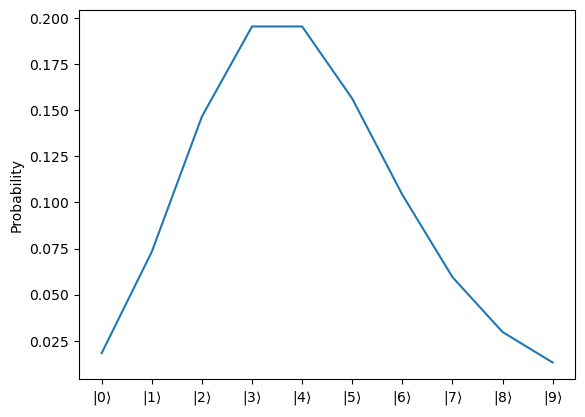

In [4]:
plt.plot(range(cutoff_dim), probs)
plt.xticks(range(cutoff_dim), [rf"$|{i}\rangle$" for i in range(cutoff_dim)])
plt.ylabel("Probability")
plt.show()